<a href="https://colab.research.google.com/github/menna03/Decision-Trees-and-K-nn-/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1 : Decision Tree


1)Data Preprocessing


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
#load the dataset
Drug = pd.read_csv ('drug.csv')
Drug.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,NaN,NORMAL,19.368,drugY


In [ ]:
#displaying the first 10 rows of the data
Drug.head(10)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,NaN,NORMAL,19.368,drugY


In [ ]:
#check for missing values
missing_vals= Drug.isnull().sum
missing_vals

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Age    Sex     BP  Cholesterol  Na_to_K   Drug
0    False  False  False        False    False  False
1    False  False  False        False    False  False
2    False  False  False        False    False  False
3    False  False  False        False     True  False
4    False  False  False        False    False  False
..     ...    ...    ...          ...      ...    ...
195  False  False  False        False    False  False
196  False  False  False        False    False  False
197  False  False  False        False    False  False
198  False  False  False         True    False  False
199  False  False  False        False    False  False

[200 rows x 6 columns]>

In [ ]:
Drug.isna().sum()* 100 / len(Drug)

Age            0.0
Sex            0.0
BP             1.0
Cholesterol    1.0
Na_to_K        0.5
Drug           0.0
dtype: float64

In [ ]:
Drug=Drug.drop(['BP', 'Cholesterol'], axis=1)

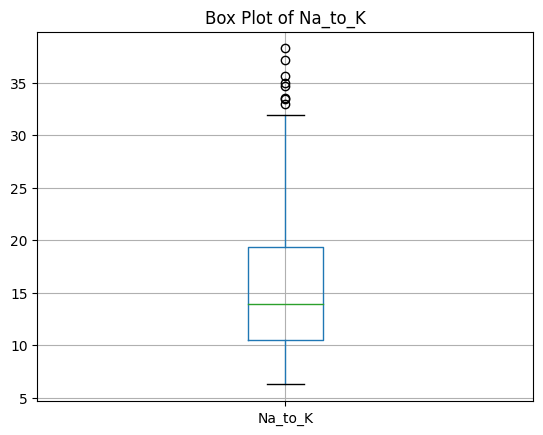

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Then, create the box plot to see the outliers in the data (Na_to_K)
Drug.boxplot(column='Na_to_K')

plt.title('Box Plot of Na_to_K')
plt.show()


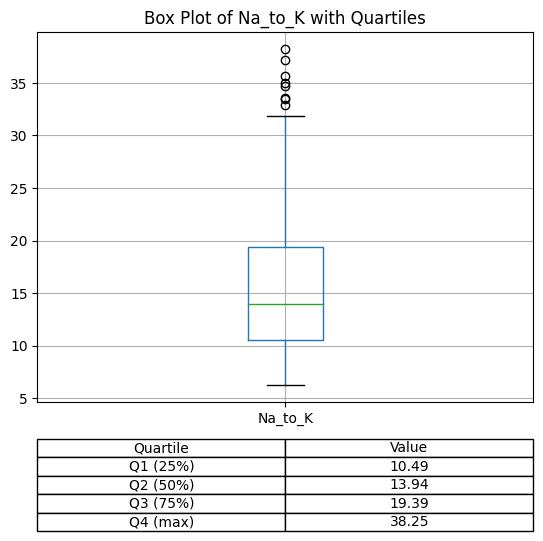

In [ ]:
import pandas as pd

na_to_k_values = Drug['Na_to_K']

# Compute quartile values
quartiles = na_to_k_values.describe(percentiles=[.25, .5, .75])
q1, q2, q3, q4 = quartiles.loc[['25%', '50%', '75%', 'max']]

# Create the box plot
ax = Drug.boxplot(column='Na_to_K')

# Create a table to display quartile values
table_data = [['Q1 (25%)', f'{q1:.2f}'],
              ['Q2 (50%)', f'{q2:.2f}'],
              ['Q3 (75%)', f'{q3:.2f}'],
              ['Q4 (max)', f'{q4:.2f}']]

table = plt.table(cellText=table_data, colLabels=['Quartile', 'Value'],
                  cellLoc='center', loc='bottom', bbox=[0, -0.35, 1, 0.25])

plt.title('Box Plot of Na_to_K with Quartiles')
plt.show()


In [ ]:
#printing the minimum, and the maximum value existed in the column
print(Drug['Na_to_K'].min())
print(Drug['Na_to_K'].max())

6.269
38.247


In [ ]:
print(Drug.shape)


(200, 4)


In [ ]:
#getting the number of objects(patients) that their Na_to_K value is less than 10.49
count_less_than_10_49 = (Drug['Na_to_K'] < 10.49).sum()

print(f"Number of values in 'Na_to_K' less than 10.49: {count_less_than_10_49}")


Number of values in 'Na_to_K' less than 10.49: 50


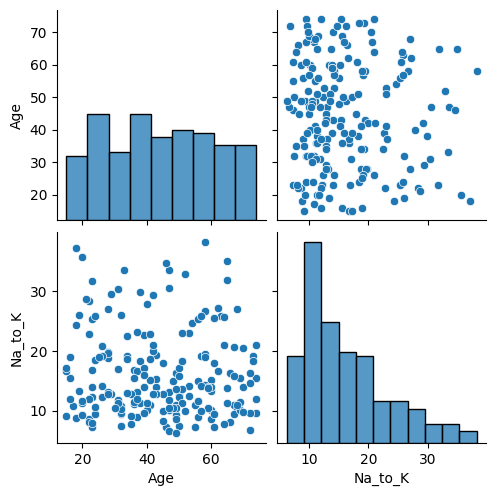

In [ ]:
import seaborn as sns
#ploting each pair of our data's features
sns.pairplot(Drug)

In [ ]:
#handle missing values by giving them the value of the mean
Drug= Drug.fillna(Drug.mean())
Drug

<ipython-input-15-4f2e3c40a7a8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Drug= Drug.fillna(Drug.mean())


,Age,Sex,Na_to_K,Drug
0,23,F,25.355000,drugY
1,47,M,13.093000,drugC
2,47,M,10.114000,drugC
3,28,F,16.126126,drugX
4,61,F,18.043000,drugY
...,...,...,...,...
195,56,F,11.567000,drugC
196,16,M,12.006000,drugC
197,52,M,9.894000,drugX
198,23,M,14.020000,drugX


In [ ]:
#encoding categorical variables using label encoder
LabelEnc=LabelEncoder()
Drug['Sex']= LabelEnc.fit_transform(Drug['Sex'])
Drug['Drug']= LabelEnc.fit_transform(Drug['Drug'])


In [ ]:
Drug.head()

,Age,Sex,Na_to_K,Drug
0,23,0,25.355000,4
1,47,1,13.093000,2
2,47,1,10.114000,2
3,28,0,16.126126,3
4,61,0,18.043000,4


In [ ]:
X = Drug.drop('Drug', axis=1)
y = Drug['Drug']


**First** **experiment**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of specific random states for each experiment
random_states = [78, 53, 9, 20, 60]

# Repeat the experiment 5 times and each time calculate the accuracy
for i in range(5):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_states[i])

    # Create a decision tree classifier
    classifier = DecisionTreeClassifier()

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Experiment {i + 1} - Random Seed: {random_states[i]}, Accuracy: {accuracy}")



Experiment 1 - Random Seed: 78, Accuracy: 0.6666666666666666
Experiment 2 - Random Seed: 53, Accuracy: 0.6666666666666666
Experiment 3 - Random Seed: 9, Accuracy: 0.5666666666666667
Experiment 4 - Random Seed: 20, Accuracy: 0.6166666666666667
Experiment 5 - Random Seed: 60, Accuracy: 0.7


# Second experiment

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store results
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

# Range of training set sizes
train_sizes = np.arange(0.3, 0.8, 0.1)

# Loop over different training set sizes
for train_size in train_sizes:
    accuracies = []
    tree_sizes = []

    # Repeat experiment with five different random seeds
    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=60)

        # Train the decision tree model
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Predictions on the test set
        y_pred = model.predict(X_test)

        # Record accuracy and tree size
        accuracies.append(accuracy_score(y_test, y_pred))
        tree_sizes.append(model.tree_.node_count)

    # Calculate and store mean, max, min accuracy and tree size
    mean_accuracies.append(np.mean(accuracies))
    max_accuracies.append(np.max(accuracies))
    min_accuracies.append(np.min(accuracies))
    mean_tree_sizes.append(np.mean(tree_sizes))
    max_tree_sizes.append(np.max(tree_sizes))
    min_tree_sizes.append(np.min(tree_sizes))

    # Print accuracy for each training set size
    print(f"Training Set Size: {train_size:.2f}, Mean Accuracy: {np.mean(accuracies):.4f}")

# Print and store the statistics in a report
report_df = pd.DataFrame({
    'Training Set Size': train_sizes,
    'Mean Accuracy': mean_accuracies,
    'Max Accuracy': max_accuracies,
    'Min Accuracy': min_accuracies,
    'Mean Tree Size': mean_tree_sizes,
    'Max Tree Size': max_tree_sizes,
    'Min Tree Size': min_tree_sizes
})

print("\nExperiment Results:\n")
report_df.head()

Training Set Size: 0.30, Mean Accuracy: 0.6314
Training Set Size: 0.40, Mean Accuracy: 0.6750
Training Set Size: 0.50, Mean Accuracy: 0.6880
Training Set Size: 0.60, Mean Accuracy: 0.7000
Training Set Size: 0.70, Mean Accuracy: 0.7067

Experiment Results:



,Training Set Size,Mean Accuracy,Max Accuracy,Min Accuracy,Mean Tree Size,Max Tree Size,Min Tree Size
0,0.3,0.631429,0.650000,0.614286,46.6,47,45
1,0.4,0.675000,0.683333,0.666667,51.0,51,51
2,0.5,0.688000,0.710000,0.680000,61.0,61,61
3,0.6,0.700000,0.712500,0.687500,75.0,75,75
4,0.7,0.706667,0.716667,0.683333,79.8,81,79


In [ ]:
report_df.head()

,Training Set Size,Mean Accuracy,Max Accuracy,Min Accuracy,Mean Tree Size,Max Tree Size,Min Tree Size
0,0.3,0.644286,0.664286,0.635714,44.2,45,43
1,0.4,0.675000,0.691667,0.650000,51.0,51,51
2,0.5,0.702000,0.710000,0.680000,61.0,61,61
3,0.6,0.690000,0.700000,0.662500,76.2,77,75
4,0.7,0.700000,0.716667,0.683333,80.2,81,79


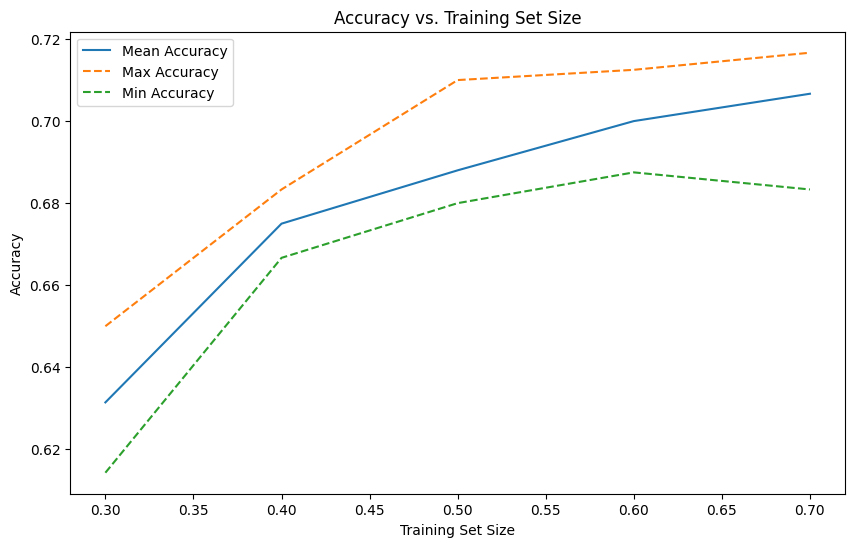

In [ ]:
import matplotlib.pyplot as plt

# Plot showing accuracy against training set size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_accuracies, label='Mean Accuracy')
plt.plot(train_sizes, max_accuracies, label='Max Accuracy', linestyle='dashed')
plt.plot(train_sizes, min_accuracies, label='Min Accuracy', linestyle='dashed')
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




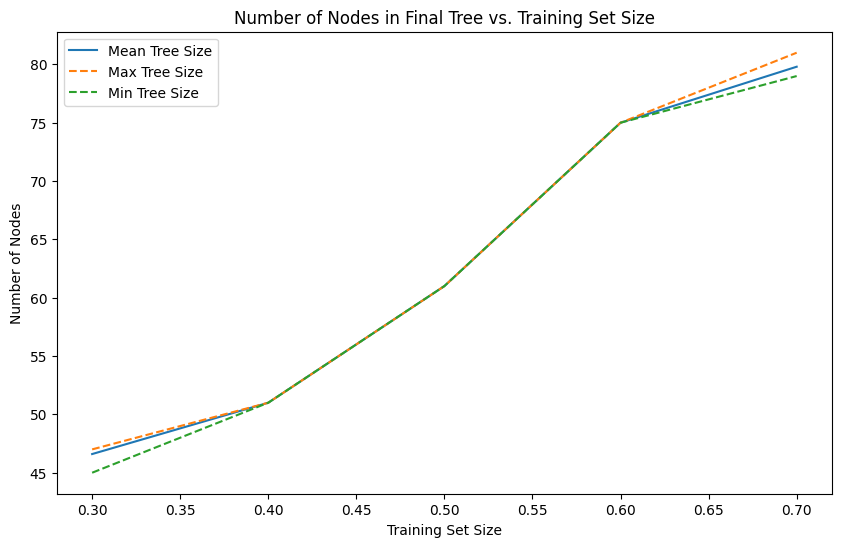

In [ ]:
# Plot showing number of nodes in the final tree against training set size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_tree_sizes, label='Mean Tree Size')
plt.plot(train_sizes, max_tree_sizes, label='Max Tree Size', linestyle='dashed')
plt.plot(train_sizes, min_tree_sizes, label='Min Tree Size', linestyle='dashed')
plt.title('Number of Nodes in Final Tree vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# getting a report about the classifier
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.00      0.00      0.00         5
           2       0.11      0.33      0.17         3
           3       0.69      0.64      0.67        14
           4       0.97      1.00      0.98        31

    accuracy                           0.72        60
   macro avg       0.42      0.45      0.43        60
weighted avg       0.71      0.72      0.71        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


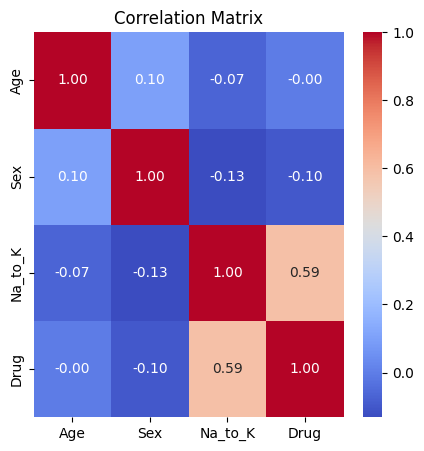

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = Drug.corr()
#plotting a correlation matrix to show how the data look like
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


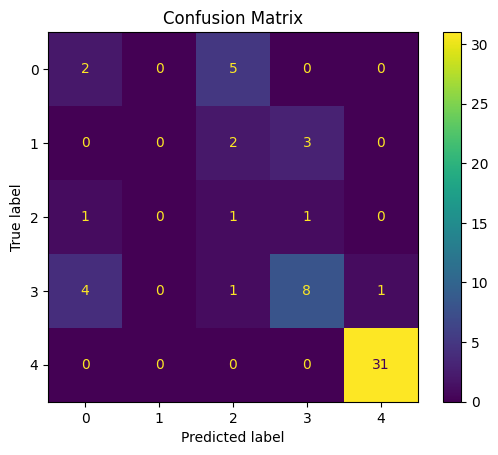

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix without label encoder
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot(cmap='viridis', values_format='d')  # You can customize the colormap and format
plt.title("Confusion Matrix")
plt.show()


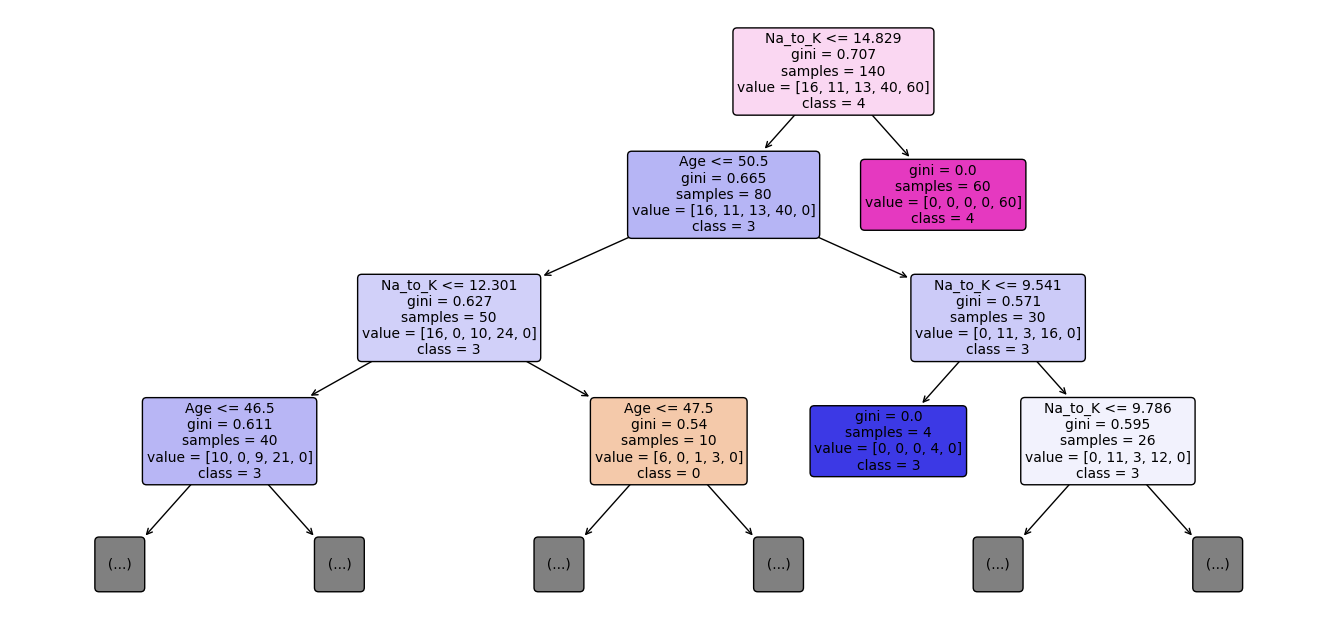

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plotting a decision tree based on the data we have
single_tree = classifier

# Convert class labels to strings
class_labels = [str(label) for label in classifier.classes_]

# Set the figure size and background color
plt.figure(figsize=(17, 8), facecolor='white')

# Plot the first 3 levels (nodes) of the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=class_labels, rounded=True, filled=True, fontsize=10, max_depth=3)

# Show the plot
plt.show()


In [ ]:
# Create a decision tree classifier
tree_clf = DecisionTreeClassifier()

# Fit the decision tree to the training data
tree_clf.fit(X_train, y_train)

# Get feature importances from the decision tree
importances = tree_clf.feature_importances_

# Use median to decide the threshold for feature selection
threshold = np.median(importances)

# Select features with importance above the threshold
select_feat = X_train.columns[importances > threshold]

print("Number of selected features:", len(select_feat))
print("Selected features:", select_feat)

Number of selected features: 1
Selected features: Index(['Na_to_K'], dtype='object')


# 20217011
#20217005
#20216129
#20216091
#20218003